In [75]:
import math, glob, os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import importlib
import wrftools as wrf
import genutils as gu
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [80]:
run='run_02_land_dry_t10'
wolist=wrf.wolist(run)[:24]
# wolist=(wolist[1], wolist[10])
flistd=[wrf.wopath(run,wo) for wo in wolist]
flistd

['/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_00:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_01:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_02:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_03:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_04:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_05:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_06:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_07:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_08:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10_09:00:00',
 '/net/wrfstore6/disk1/nsparks/itc/run/run_02_land_dry_t10/wrfout_d03_2007-09-10

Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_13:00:00.P.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_13:00:00.cc.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_13:00:00.u.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_13:00:00.v.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_14:00:00.P.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_14:00:00.cc.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_14:00:00.u.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_14:00:00.v.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_15:00:00.P.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_15:00:00.cc.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_15:00:00.u.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_15:00:00.v.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_16:00:00.P.raw.npy
Creating: run_02_land_dry_t10/wrfout_d03_2007-09-10_16:00:00.cc.raw.npy
Cr

Text(0.5, 0.98, 'run_02_land_dry_t10')

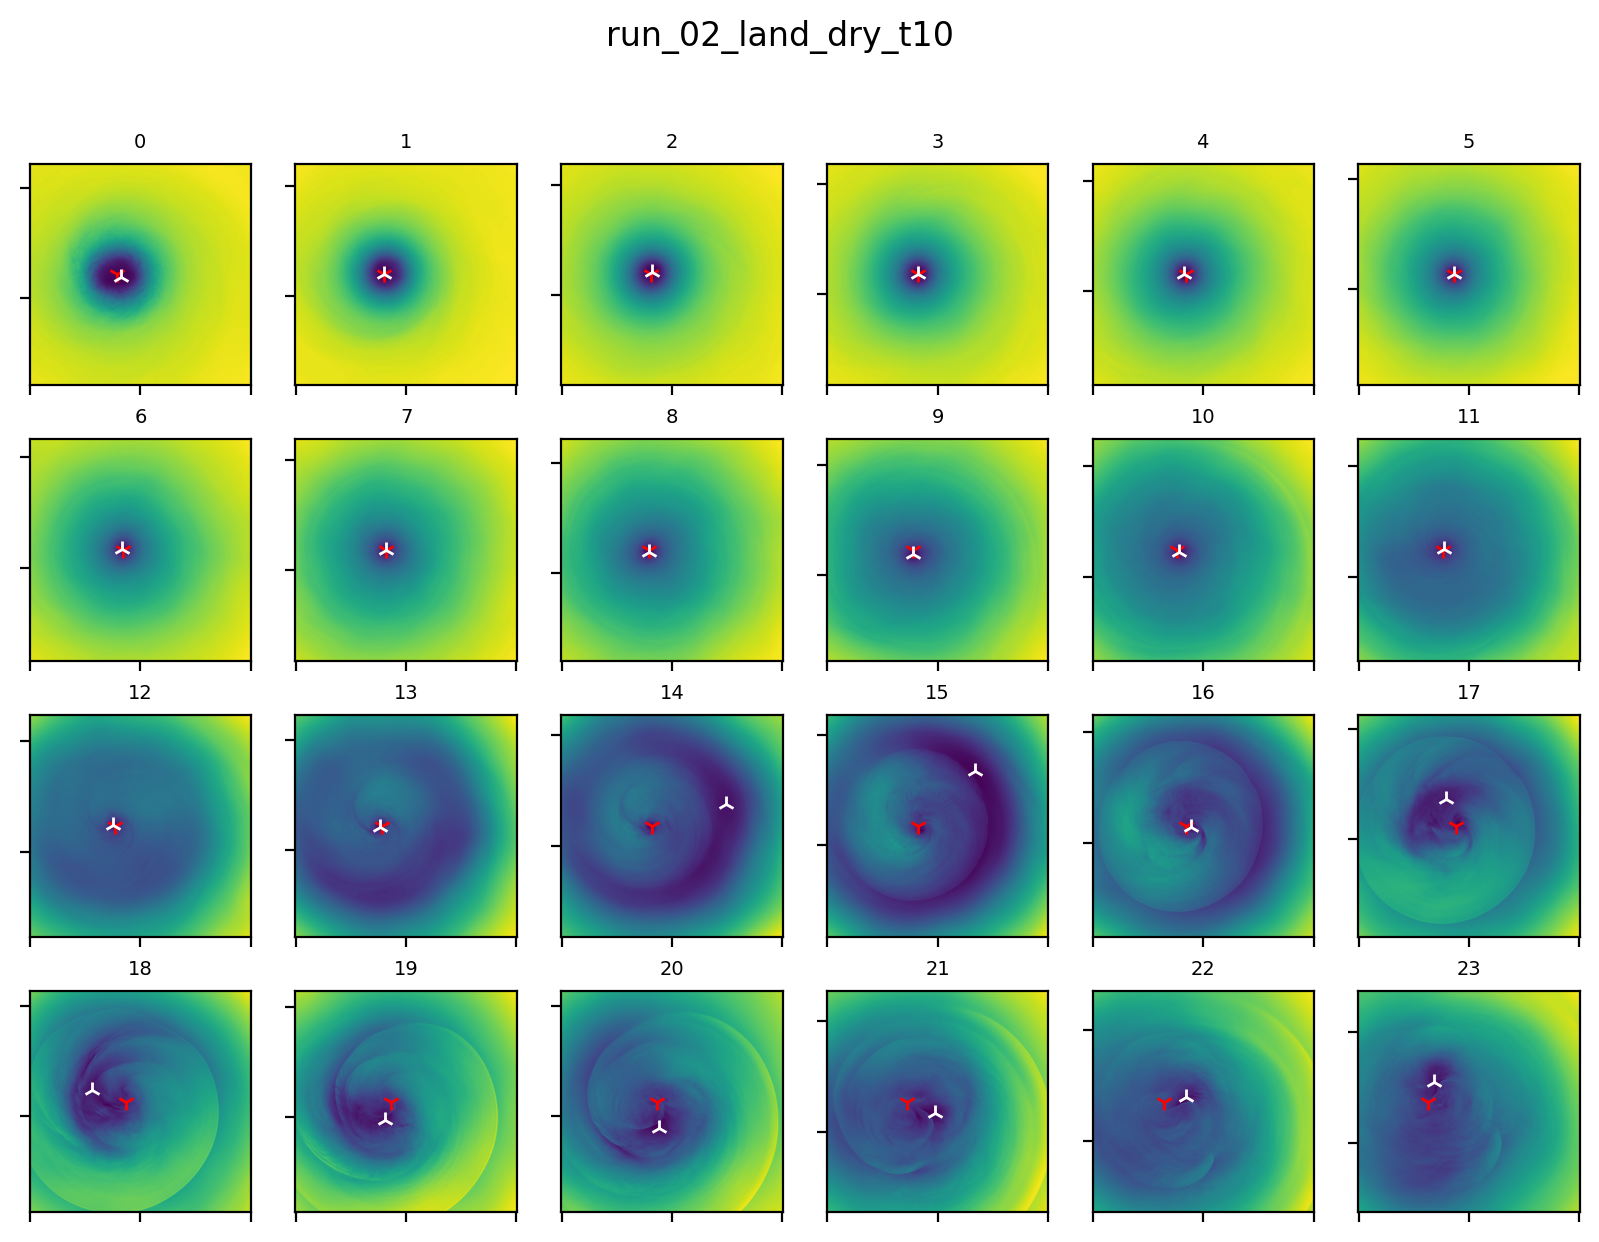

In [81]:
fig,axs=plt.subplots(4,6,dpi=200,figsize=(10,7))


for n,fpath in enumerate(flistd[0:]):
    ax=axs.flat[n]
#     print(fpath)

    P=wrf.getWRF(fpath,'P',z=10)
    Ps=gu.smooth2d(P,15)
    xmin,ymin=np.unravel_index(Ps.argmin(),Ps.shape)
    
    x,y=wrf.getCoords(fpath)
    x=x/1000
    y=y/1000
    cc=wrf.getWRF(fpath,'cc')
    
    xcc=x[ymin]
    ycc=y[xmin]
    
    xc=x[cc[1]]
    yc=y[cc[0]]

    rng=-200,200
    xx=np.logical_and(x>rng[0],x<rng[1])
    yx=np.logical_and(x>rng[0],x<rng[1])
    ix=np.ix_(xx,yx)
    y=y[yx]
    x=x[xx]
    P=P[ix]


    im=gu.imshowxy(x,y,P,ax=ax)
    ax.plot(xc,yc,'1r')
    ax.plot(xcc,ycc,'2w') 
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(str(n),fontsize=7)
    ax.set_aspect('equal','box')
plt.suptitle(run)
    
    # ax.set_xlim(rng)
    # ax.set_ylim(rng)
#     im.set_clim()